In [ ]:
from google.colab import files
uploaded=files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


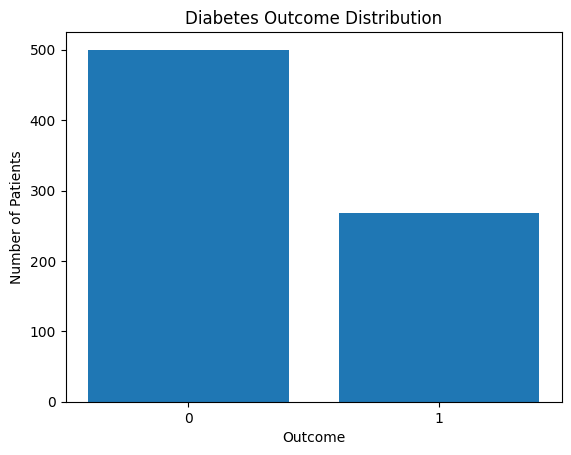

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("diabetes.csv")

# Count values of Outcome
outcome_counts = df["Outcome"].value_counts()

# Plot bar chart
plt.figure()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.title("Diabetes Outcome Distribution")
plt.xticks([0,1])
plt.show()


/tmp/ipython-input-3129284162.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([glucose_0, glucose_1], labels=[0,1])


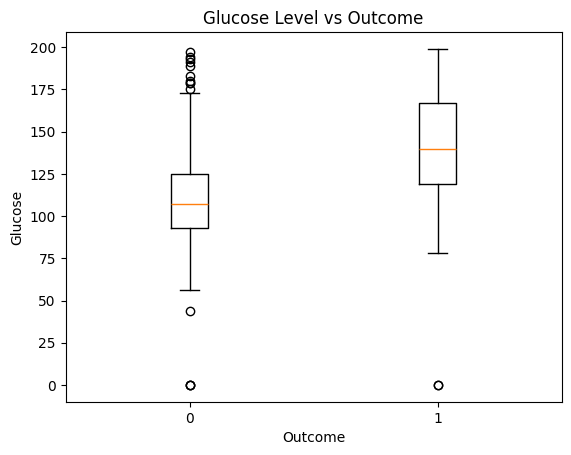

In [ ]:
# Separate glucose values by outcome
glucose_0 = df[df["Outcome"] == 0]["Glucose"]
glucose_1 = df[df["Outcome"] == 1]["Glucose"]

# Plot boxplot
plt.boxplot([glucose_0, glucose_1], labels=[0,1])
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title("Glucose Level vs Outcome")
plt.show()


/tmp/ipython-input-3630428838.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bmi_0, bmi_1], labels=[0,1])


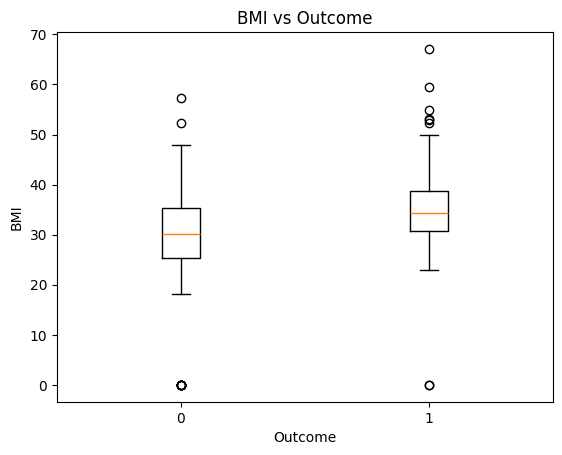

In [ ]:
bmi_0 = df[df["Outcome"] == 0]["BMI"]
bmi_1 = df[df["Outcome"] == 1]["BMI"]

plt.boxplot([bmi_0, bmi_1], labels=[0,1])
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.title("BMI vs Outcome")
plt.show()


/tmp/ipython-input-1115957523.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([age_0, age_1], labels=[0,1])


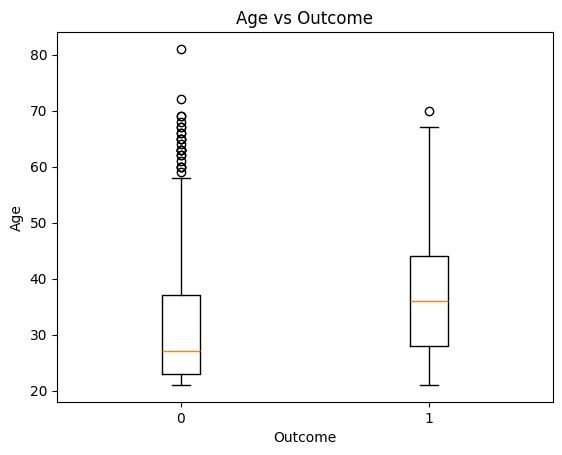

In [ ]:
age_0 = df[df["Outcome"] == 0]["Age"]
age_1 = df[df["Outcome"] == 1]["Age"]

plt.boxplot([age_0, age_1], labels=[0,1])
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.title("Age vs Outcome")
plt.show()


In [ ]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols:
    df[col] = df[col].replace(0, df[col].mean())


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


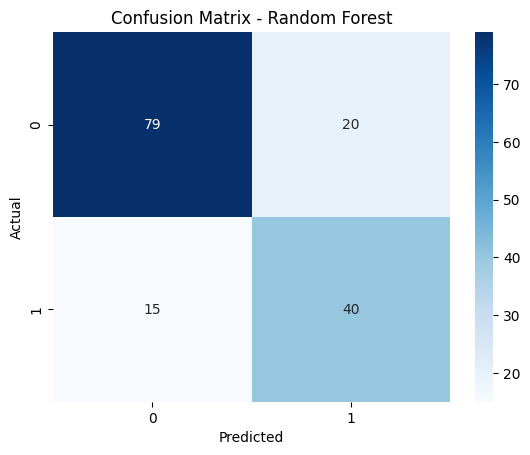

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Accuracy: 0.7727272727272727
Precision: 0.6666666666666666
Recall: 0.7272727272727273
F1 Score: 0.6956521739130435


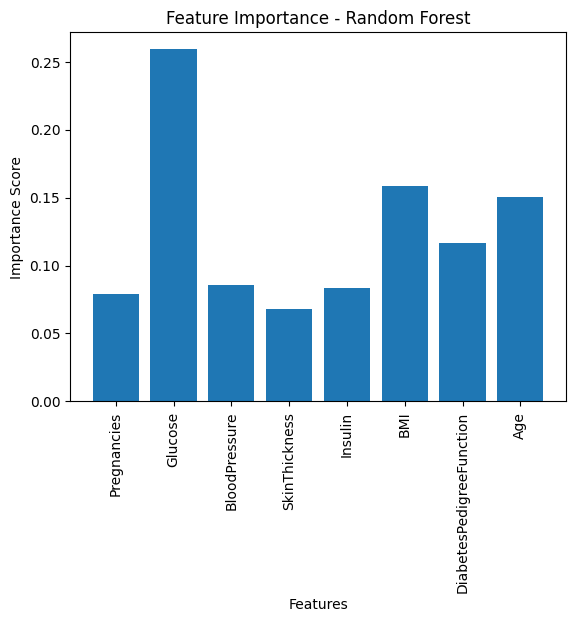

In [ ]:
import numpy as np

importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()
